In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [2]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):

    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [3]:
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

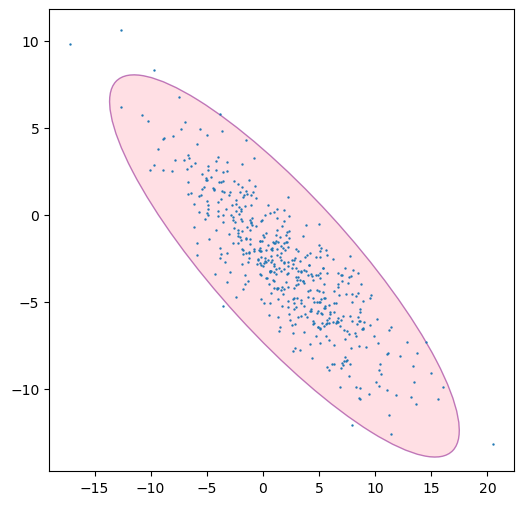

In [6]:
fig, ax_kwargs = plt.subplots(figsize=(6, 6))
dependency_kwargs = [[-0.8, 0.5],
                     [-0.2, 0.5]]
mu = 2, -3
scale = 6, 5


x, y = get_correlated_dataset(500, dependency_kwargs, mu, scale)
# Plot the ellipse with zorder=0 in order to demonstrate
# its transparency (caused by the use of alpha).
confidence_ellipse(x, y, ax_kwargs,
                   alpha=0.5, facecolor='pink', edgecolor='purple', zorder=0)

ax_kwargs.scatter(x, y, s=0.5)
#ax_kwargs.scatter(mu[0], mu[1], c='red', s=3)
#ax_kwargs.set_title('Confidence ellipse')

fig.subplots_adjust(hspace=0.25)

#plt.savefig('scatter', dpi=300, facecolor='white',bbox_inches='tight' )
